# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

You will be able to:
* Solve the monty hall problem using simulations

## Run a Simulation

This is not a traditional application of Bayes' Theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool of Bayesian's&mdash;running a simulation. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [41]:
#Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


simulations=list(range(50,10000,25))
staying_results=[]
switching_results=[]

for simulation in simulations:
    win_count=0
    switch_and_win=0
    stay_and_win=0
    
    i=0
    while i<=simulation:
        winning_door=np.random.randint(1,4)
        goat_doors=[x for x in [1,2,3] if x !=winning_door]
        chosen_door=np.random.randint(1,4)
        
        unchosen_goat_doors=[x for x in goat_doors if x!=chosen_door]

        opened_door=np.random.choice(unchosen_goat_doors)
        closed_doors=[x for x in [1,2,3] if x!=opened_door]
        switch=np.random.randint(0,2)

        if switch==1:
            new_choice=[x for x in closed_doors if x!=chosen_door]
        else:
            new_choice=[chosen_door]
            
        if winning_door==new_choice[0]:
            if switch==1:
                switch_and_win+=1
                win_count+=1
            elif switch==0:
                stay_and_win+=1
                win_count+=1
        else:
            pass
        
        i+=1
        
    staying_results.append(stay_and_win/win_count)
    switching_results.append(switch_and_win/win_count)

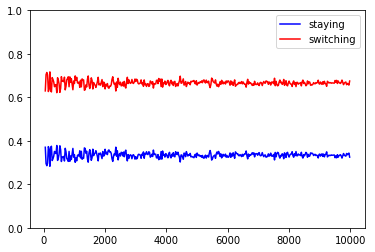

In [42]:
plt.plot(simulations,staying_results,color='blue',label='staying')
plt.plot(simulations,switching_results,color='red',label='switching')
plt.ylim(0,1)
plt.legend()

In [43]:
stay_win_avg=np.array(staying_results).mean()
switch_win_avg=np.array(switching_results).mean()
stay_win_avg,switch_win_avg

(0.33418020669322746, 0.6658197933067727)

## Summary

In this lab you further investigated the idea of Bayes' Theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully this was an entertaining little experience! 